## Quantitative Methods Assessment 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('coursework_1_data_2019.csv')

In [2]:
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

**Column Addition**

Research Question: What factors of budget would have influenced on the Condition X(Child Obesity) in 2008-2018

In [4]:
df['2008_xrate'] = df['2008_cases_total'] / df['2008_pop_total'] * 100 #regional percentage of x case on the population
df['2013_xrate'] = df['2013_cases_total'] / df['2013_pop_total'] * 100
df['2018_xrate'] = df['2018_cases_total'] / df['2018_pop_total'] * 100

df['cagr_case'] = ((df['2018_cases_total']/df['2008_cases_total'])**(1/10) - 1) #compound annual growth rate from 2008 to 2018 on case
df['cagr_rate'] = ((df['2018_xrate']/df['2008_xrate'])**(1/10) - 1) #compound annual growth rate from 2008 to 2018 on case

df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_xrate,2013_xrate,2018_xrate,cagr_case,cagr_rate
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,41000,18000,19000,London,london_borough,0.343402,0.345752,0.419740,0.025527,0.020276
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,74000,30000,26000,London,london_borough,0.158327,0.172643,0.217162,0.036714,0.032103
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,0.158762,0.184828,0.204356,0.038845,0.025567
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,50000,10000,7000,South West,unitary_authority,0.255283,0.243388,0.260915,0.008036,0.002184
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,8000,3000,13000,East of England,unitary_authority,0.196605,0.198414,0.215296,0.016695,0.009123


**Descriptive Statistics**

In [5]:
#df of number of cases and populations(2008, 2013, 2018) / 6 funding fields
df2 = df[['2008_cases_total', '2013_cases_total', '2018_cases_total', '2008_pop_total', '2013_pop_total', '2018_pop_total', 'total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling']]
#percentage of x cases(2008, 2013, 2018) per population, annual growth rate and 6 funding fields
df3 = df[['2008_xrate', '2013_xrate', '2018_xrate', 'cagr_case', 'cagr_rate', 'total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling']]

In [6]:
df2.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1075.296053,1159.513158,1278.605263,3.409223e+05,3.542821e+05,3.682895e+05,2.703092e+05,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579
std,922.378705,997.231047,1069.691997,2.621354e+05,2.788745e+05,2.945969e+05,2.104618e+05,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607
min,5.000000,1.000000,4.000000,2.200000e+03,2.385000e+03,2.440000e+03,2.000000e+03,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,493.500000,531.750000,592.500000,1.894748e+05,1.880672e+05,1.934285e+05,1.400000e+05,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000
50%,729.000000,794.500000,873.500000,2.540925e+05,2.577715e+05,2.642035e+05,2.000000e+05,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000
75%,1386.000000,1470.250000,1641.500000,3.751225e+05,4.024990e+05,4.094285e+05,3.017500e+05,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000
max,5065.000000,5582.000000,5745.000000,1.411380e+06,1.528154e+06,1.623387e+06,1.170000e+06,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000


In [7]:
df3.describe()

,2008_xrate,2013_xrate,2018_xrate,cagr_case,cagr_rate,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.309725,0.320978,0.344673,0.018380,0.012377,2.703092e+05,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579
std,0.137058,0.139096,0.138712,0.011060,0.010656,2.104618e+05,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607
min,0.074004,0.041929,0.101388,-0.028358,-0.032141,2.000000e+03,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,0.214841,0.226886,0.253539,0.012818,0.005754,1.400000e+05,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000
50%,0.291452,0.298483,0.318207,0.018110,0.009534,2.000000e+05,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000
75%,0.365028,0.381066,0.406704,0.024280,0.018738,3.017500e+05,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000
max,0.824132,0.849613,0.872881,0.051044,0.052165,1.170000e+06,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000


In [8]:
#2008 case, 2018 case, annual growth, total budget

d1 = df2['2008_cases_total'] # 5~5065
d2 = df2['2018_cases_total'] # 1~5582
d3 = df3['cagr_rate'] # -3.21~5.21
d4 = df3['total_budget'] # 2,000~1,170,000

<AxesSubplot:>

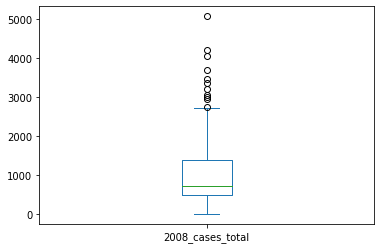

In [ ]:
d1.plot.box()

<AxesSubplot:>

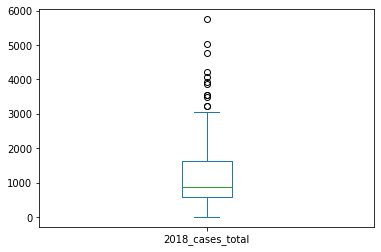

In [10]:
d2.plot.box()

<AxesSubplot:>

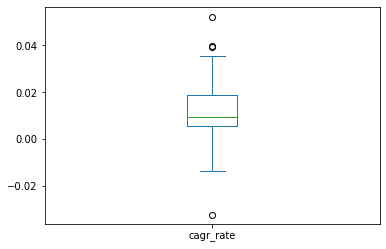

In [11]:
d3.plot.box()

<AxesSubplot:>

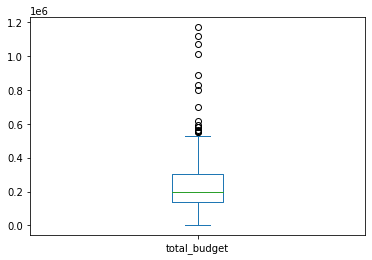

In [12]:
d4.plot.box()

In [13]:
from scipy.special import erf
import scipy.stats as stats
import pylab as pl

<function matplotlib.pyplot.show(close=None, block=None)>

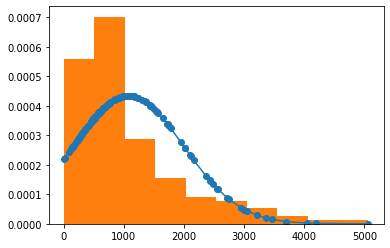

In [14]:
# histogram and normal distribution
d1_ = sorted(d1)
fit = stats.norm.pdf(d1_, np.mean(d1_), np.std(d1_))
pl.plot(d1_, fit, '-o')
pl.hist(d1_, density=True, stacked=True)
pl.show

<function matplotlib.pyplot.show(close=None, block=None)>

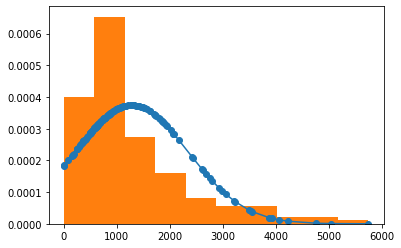

In [17]:
d2_ = sorted(d2)
fit = stats.norm.pdf(d2_, np.mean(d2_), np.std(d2_))
pl.plot(d2_, fit, '-o')
pl.hist(d2_, density=True, stacked=True)
pl.show

<function matplotlib.pyplot.show(close=None, block=None)>

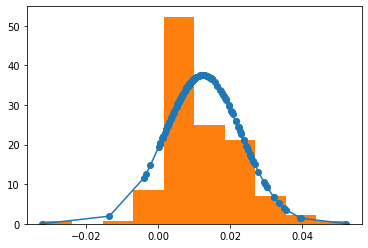

In [18]:
d3_ = sorted(d3)
fit = stats.norm.pdf(d3_, np.mean(d3_), np.std(d3_))
pl.plot(d3_, fit, '-o')
pl.hist(d3_, density=True, stacked=True)
pl.show

<function matplotlib.pyplot.show(close=None, block=None)>

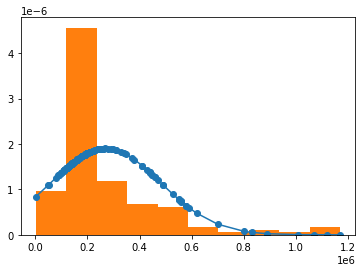

In [19]:
d4_ = sorted(d4)
fit = stats.norm.pdf(d4_, np.mean(d4_), np.std(d4_))
pl.plot(d4_, fit, '-o')
pl.hist(d4_, density=True, stacked=True)
pl.show

**Erasing Outliers**

In [20]:
#outlier function
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    return np.where((data > upper_bound)|(data < lower_bound))

In [21]:
d1_outlier = outliers_iqr(d1)
d1_outlier

(array([  6,  26,  32,  42,  49,  55,  62,  68,  89,  92, 120], dtype=int64),)

In [22]:
#outlier dataset for each df
d1_outlier = outliers_iqr(d1)[0]
d2_outlier = outliers_iqr(d2)[0]
d3_outlier = outliers_iqr(d3)[0]
d4_outlier = outliers_iqr(d4)[0]

In [23]:
df.loc[d1_outlier]

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_xrate,2013_xrate,2018_xrate,cagr_case,cagr_rate
6,Birmingham,3207,3621,3927,1026238,1083189,1086463,838,823,870,...,126000,140000,99000,West Midlands,metropolitan_borough,0.312501,0.334291,0.361448,0.020460,0.014658
26,Cornwall,3002,3299,3557,532854,571165,598530,933,1118,1187,...,20000,63000,34000,South West,unitary_authority,0.563381,0.577591,0.594289,0.017109,0.005355
32,Derbyshire,3691,3905,4222,763335,787700,842279,1162,1206,1345,...,134000,78000,61000,East Midlands,non_metropolitan_county,0.483536,0.495747,0.501259,0.013532,0.003606
42,Essex,2749,2889,3218,1397082,1470524,1541363,1063,1133,1244,...,284000,75000,97000,East of England,non_metropolitan_county,0.196767,0.196461,0.208776,0.015877,0.005942
49,Hampshire,2946,3247,3536,1292464,1398789,1457991,1065,1079,1256,...,266000,203000,89000,South East,non_metropolitan_county,0.227937,0.232129,0.242526,0.018422,0.006223
55,Hertfordshire,3456,3589,3870,1091385,1101241,1175458,1307,1178,1343,...,180000,43000,80000,East of England,non_metropolitan_county,0.316662,0.325905,0.329233,0.011379,0.003901
62,Kent,3356,3703,4063,1411380,1528154,1623387,1398,1569,1621,...,291000,121000,63000,South East,non_metropolitan_county,0.237781,0.242319,0.250279,0.019301,0.005136
68,Lancashire,4199,4419,5032,1173146,1208809,1267187,1582,1699,1907,...,163000,33000,91000,North West,non_metropolitan_county,0.357926,0.365566,0.397100,0.018262,0.010440
89,Northamptonshire,3050,3213,3501,683890,716111,751413,1078,1114,1213,...,34000,71000,85000,East Midlands,non_metropolitan_county,0.445978,0.448673,0.465922,0.013886,0.004384
92,Nottinghamshire,5065,5582,5745,778640,862292,870182,1762,2065,2000,...,166000,13000,20000,East Midlands,non_metropolitan_county,0.650493,0.647345,0.660207,0.012677,0.001483


In [24]:
df.loc[d1_outlier, '2008_cases_total']
df.loc[d2_outlier, '2018_cases_total']
df.loc[d3_outlier, 'cagr_rate']
df.loc[d4_outlier, 'total_budget']

6       831000
20      551000
32      580000
33      580000
42     1070000
49     1120000
55      890000
62     1170000
68      800000
69      550000
83      619000
89      590000
94      559000
120     561000
124     559000
126    1010000
142     700000
Name: total_budget, dtype: int64

In [25]:
#cleaning outliers - no_d1_index: indexes of row which doesn't contain outlier from d1
# 2008 case
no_d1_index = []
for i in df.index:
    if i not in d1_outlier:
        no_d1_index.append(i)
print(len(no_d1_index))
df_clean_d1 = df.loc[no_d1_index].reset_index(drop=True)
df_clean_d1

141


,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_xrate,2013_xrate,2018_xrate,cagr_case,cagr_rate
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,41000,18000,19000,London,london_borough,0.343402,0.345752,0.419740,2.552673,2.027636
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,74000,30000,26000,London,london_borough,0.158327,0.172643,0.217162,3.671426,3.210286
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,0.158762,0.184828,0.204356,3.884514,2.556745
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,50000,10000,7000,South West,unitary_authority,0.255283,0.243388,0.260915,0.803639,0.218425
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,8000,3000,13000,East of England,unitary_authority,0.196605,0.198414,0.215296,1.669472,0.912295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,41000,14000,8000,North West,metropolitan_borough,0.824132,0.849613,0.872881,1.554583,0.576349
137,Wokingham,119,146,169,160803,165785,166687,50,70,67,...,19000,10000,6000,South East,unitary_authority,0.074004,0.088066,0.101388,3.570000,3.198460
138,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,55000,50000,28000,West Midlands,metropolitan_borough,0.601475,0.623123,0.654454,1.825804,0.847734
139,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,...,76000,67000,30000,West Midlands,non_metropolitan_county,0.486108,0.505137,0.508297,1.762865,0.447355


In [27]:
d1_clean = df_clean_d1['2008_cases_total']
d1_clean

0       593
1       539
2       360
3       456
4       311
       ... 
136    2560
137     119
138    1442
139    2718
140    1170
Name: 2008_cases_total, Length: 141, dtype: int64

In [28]:
# 2018 case
no_d2_index = []
for i in df.index:
    if i not in d2_outlier:
        no_d2_index.append(i)
print(len(no_d2_index))
df_clean_d2 = df.loc[no_d2_index].reset_index(drop=True)
df_clean_d2

140


,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_xrate,2013_xrate,2018_xrate,cagr_case,cagr_rate
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,41000,18000,19000,London,london_borough,0.343402,0.345752,0.419740,2.552673,2.027636
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,74000,30000,26000,London,london_borough,0.158327,0.172643,0.217162,3.671426,3.210286
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,0.158762,0.184828,0.204356,3.884514,2.556745
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,50000,10000,7000,South West,unitary_authority,0.255283,0.243388,0.260915,0.803639,0.218425
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,8000,3000,13000,East of England,unitary_authority,0.196605,0.198414,0.215296,1.669472,0.912295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Windsor and Maidenhead,455,485,527,142679,144674,152610,191,191,195,...,11000,12000,4000,South East,unitary_authority,0.318898,0.335236,0.345325,1.479875,0.799326
136,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,41000,14000,8000,North West,metropolitan_borough,0.824132,0.849613,0.872881,1.554583,0.576349
137,Wokingham,119,146,169,160803,165785,166687,50,70,67,...,19000,10000,6000,South East,unitary_authority,0.074004,0.088066,0.101388,3.570000,3.198460
138,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,55000,50000,28000,West Midlands,metropolitan_borough,0.601475,0.623123,0.654454,1.825804,0.847734


In [29]:
d2_clean = df_clean_d2['2018_cases_total']

In [30]:
# annual growth rate
no_d3_index = []
for i in df.index:
    if i not in d3_outlier:
        no_d3_index.append(i)
print(len(no_d3_index))
df_clean_d3 = df.loc[no_d3_index].reset_index(drop=True)
df_clean_d3

148


,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_xrate,2013_xrate,2018_xrate,cagr_case,cagr_rate
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,41000,18000,19000,London,london_borough,0.343402,0.345752,0.419740,2.552673,2.027636
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,74000,30000,26000,London,london_borough,0.158327,0.172643,0.217162,3.671426,3.210286
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,0.158762,0.184828,0.204356,3.884514,2.556745
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,50000,10000,7000,South West,unitary_authority,0.255283,0.243388,0.260915,0.803639,0.218425
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,8000,3000,13000,East of England,unitary_authority,0.196605,0.198414,0.215296,1.669472,0.912295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,41000,14000,8000,North West,metropolitan_borough,0.824132,0.849613,0.872881,1.554583,0.576349
144,Wokingham,119,146,169,160803,165785,166687,50,70,67,...,19000,10000,6000,South East,unitary_authority,0.074004,0.088066,0.101388,3.570000,3.198460
145,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,55000,50000,28000,West Midlands,metropolitan_borough,0.601475,0.623123,0.654454,1.825804,0.847734
146,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,...,76000,67000,30000,West Midlands,non_metropolitan_county,0.486108,0.505137,0.508297,1.762865,0.447355


In [31]:
d3_clean = df_clean_d3['cagr_rate']

In [32]:
# total budget
no_d4_index = []
for i in df.index:
    if i not in d4_outlier:
        no_d4_index.append(i)
print(len(no_d4_index))
df_clean_d4 = df.loc[no_d4_index].reset_index(drop=True)
df_clean_d4

135


,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_xrate,2013_xrate,2018_xrate,cagr_case,cagr_rate
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,41000,18000,19000,London,london_borough,0.343402,0.345752,0.419740,2.552673,2.027636
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,74000,30000,26000,London,london_borough,0.158327,0.172643,0.217162,3.671426,3.210286
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,0.158762,0.184828,0.204356,3.884514,2.556745
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,50000,10000,7000,South West,unitary_authority,0.255283,0.243388,0.260915,0.803639,0.218425
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,8000,3000,13000,East of England,unitary_authority,0.196605,0.198414,0.215296,1.669472,0.912295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,41000,14000,8000,North West,metropolitan_borough,0.824132,0.849613,0.872881,1.554583,0.576349
131,Wokingham,119,146,169,160803,165785,166687,50,70,67,...,19000,10000,6000,South East,unitary_authority,0.074004,0.088066,0.101388,3.570000,3.198460
132,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,55000,50000,28000,West Midlands,metropolitan_borough,0.601475,0.623123,0.654454,1.825804,0.847734
133,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,...,76000,67000,30000,West Midlands,non_metropolitan_county,0.486108,0.505137,0.508297,1.762865,0.447355


In [33]:
d4_clean = df_clean_d4['total_budget']

In [34]:
d1_clean

0       593
1       539
2       360
3       456
4       311
       ... 
136    2560
137     119
138    1442
139    2718
140    1170
Name: 2008_cases_total, Length: 141, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

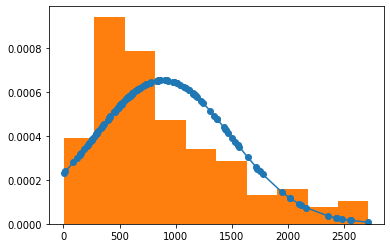

In [36]:
# reploting the histograms and normal distributions w.o/outliers
d1_clean_ = sorted(d1_clean)
fit = stats.norm.pdf(d1_clean_, np.mean(d1_clean_), np.std(d1_clean_))
pl.plot(d1_clean_, fit, '-o')
pl.hist(d1_clean_, density=True, stacked=True)
pl.show

<function matplotlib.pyplot.show(close=None, block=None)>

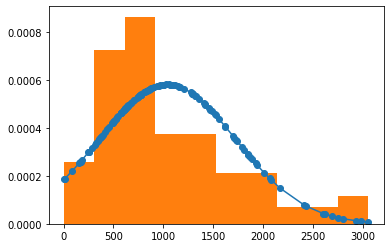

In [39]:
d2_clean_ = sorted(d2_clean)
fit = stats.norm.pdf(d2_clean_, np.mean(d2_clean_), np.std(d2_clean_))
pl.plot(d2_clean_, fit, '-o')
pl.hist(d2_clean_, density=True, stacked=True)
pl.show

<function matplotlib.pyplot.show(close=None, block=None)>

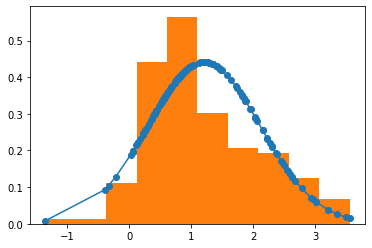

In [40]:
d3_clean_ = sorted(d3_clean)
fit = stats.norm.pdf(d3_clean_, np.mean(d3_clean_), np.std(d3_clean_))
pl.plot(d3_clean_, fit, '-o')
pl.hist(d3_clean_, density=True, stacked=True)
pl.show

<function matplotlib.pyplot.show(close=None, block=None)>

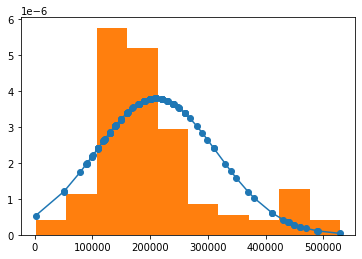

In [41]:
d4_clean_ = sorted(d4_clean)
fit = stats.norm.pdf(d4_clean_, np.mean(d4_clean_), np.std(d4_clean_))
pl.plot(d4_clean_, fit, '-o')
pl.hist(d4_clean_, density=True, stacked=True)
pl.show

**Correlation**

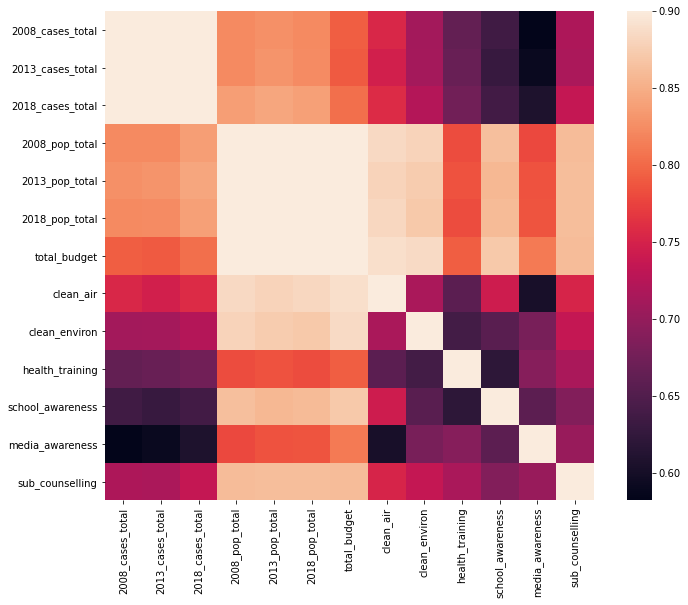

In [50]:
corr = df2.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=.9, square=True);

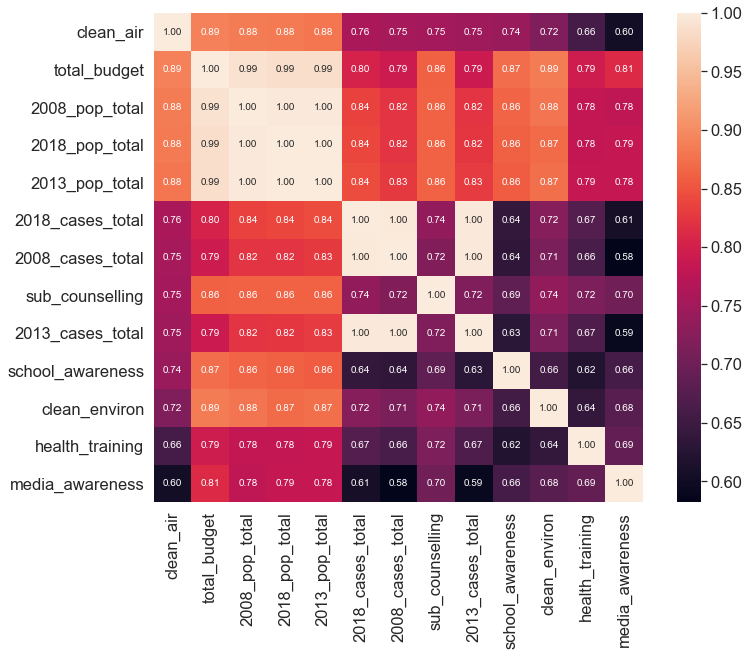

In [51]:
k=15
cols = corr.nlargest(k, 'clean_air')['clean_air'].index
heat = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:>

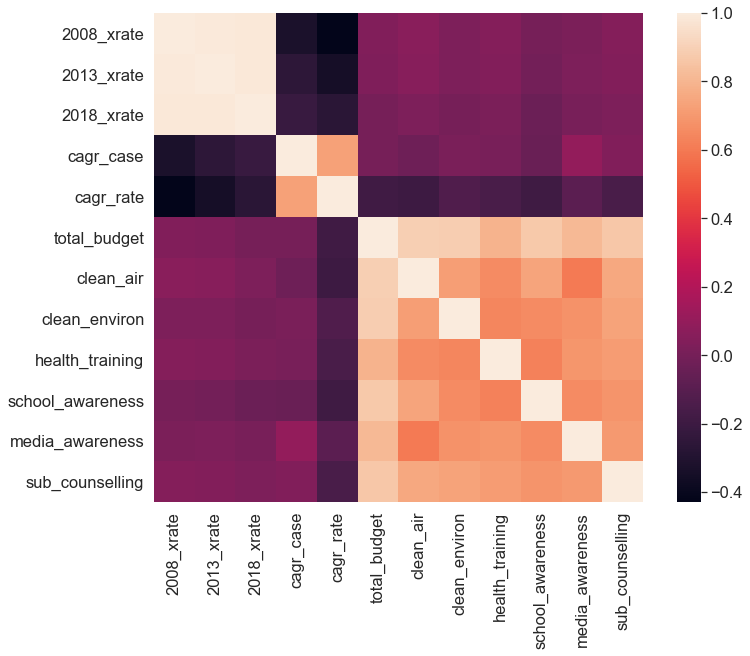

In [52]:
corr1 = df3.corr()
f1, ax1 = plt.subplots(figsize=(12, 9))
sns.heatmap(corr1, vmax=1.0, square=True)

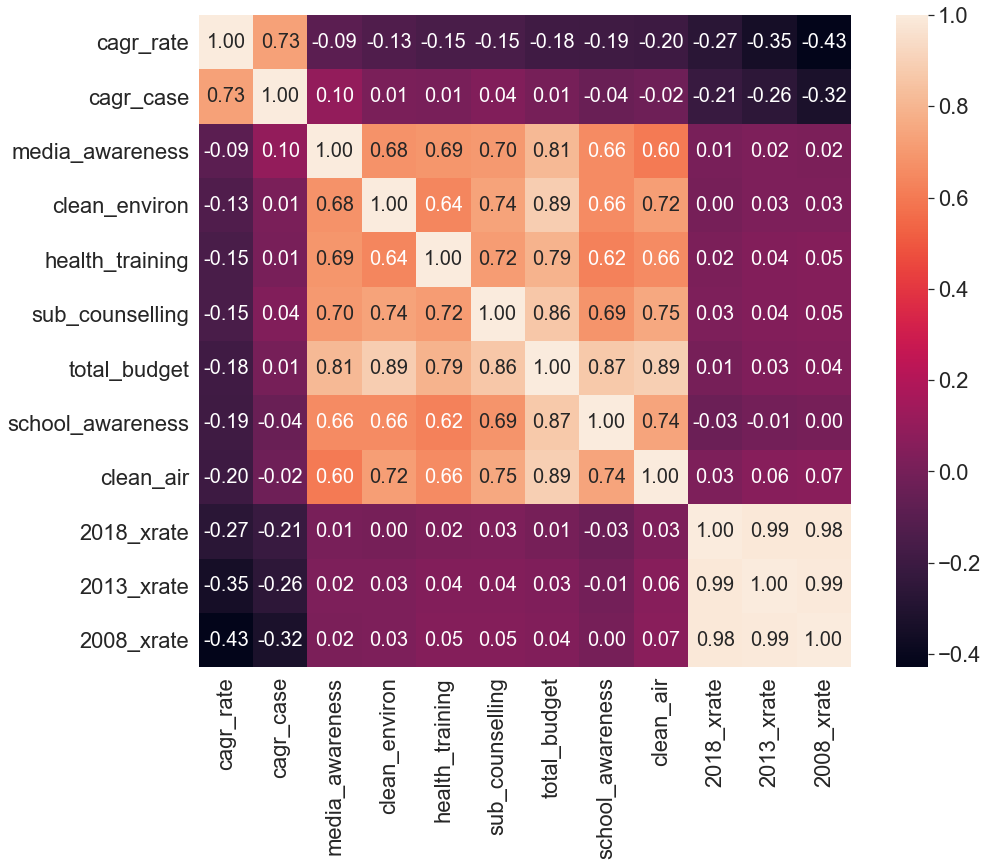

In [54]:
k=15
cols = corr1.nlargest(k, 'cagr_rate')['cagr_rate'].index
heat = np.corrcoef(df3[cols].values.T)
sns.set(font_scale=2)
plt.subplots(figsize=(16, 12))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# + male/female difference // cagr_rate & 6 funding fields correlation only visualisation
# + Don't we have anything further to consider when it comes to correlation study? 
# + e.g.) correlation coefficient(Pearson's), p-value, degree of freedom, threshold of p-value, Outliers? Simpson's paradox?
# + Are the two variables linearly correlated? When can we consider to put out outliers? 
# + Let's make the figures a bit more beautiful.

**Minimising Population Effect**

Let's have a look over the budget per person

In [69]:
#another column addition

df['avg_pop'] = (df['2008_pop_total'] + df['2013_pop_total'] + df['2018_pop_total']) / 3  ## average population throughout 2008-2018
df['avg_pop'] = df['avg_pop'].astype('int')


#budget per capita for each region
df['budget_per_pop'] = df['total_budget'] / df['avg_pop']
df['cleanair_per_pop'] = df['clean_air'] / df['avg_pop']
df['cleanenv_per_pop'] = df['clean_environ'] / df['avg_pop']
df['health_per_pop'] = df['health_training'] / df['avg_pop']
df['school_per_pop'] = df['school_awareness'] / df['avg_pop']
df['media_per_pop'] = df['media_awareness'] / df['avg_pop']
df['counsel_per_pop'] = df['sub_counselling'] / df['avg_pop']

df

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,cagr_case,cagr_rate,avg_pop,budget_per_pop,cleanair_per_pop,cleanenv_per_pop,health_per_pop,school_per_pop,media_per_pop,counsel_per_pop
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,2.552673,2.027636,177831.000000,0.781641,0.118090,0.123713,0.101220,0.230556,0.101220,0.106843
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,3.671426,3.210286,346817.333333,0.634340,0.144168,0.049017,0.066317,0.213369,0.086501,0.074967
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,3.884514,2.556745,242882.666667,0.658754,0.168806,0.185275,0.020586,0.107048,0.119399,0.057641
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,0.803639,0.218425,180311.333333,0.892900,0.183017,0.232930,0.105373,0.277298,0.055460,0.038822
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,1.669472,0.912295,164485.000000,0.790346,0.224945,0.316138,0.103353,0.048637,0.018239,0.079035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,1.554583,0.576349,321657.333333,0.649760,0.214514,0.146118,0.093267,0.127465,0.043525,0.024871
148,Wokingham,119,146,169,160803,165785,166687,50,70,67,...,3.570000,3.198460,164425.000000,0.662916,0.121636,0.249354,0.079063,0.115554,0.060818,0.036491
149,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,1.825804,0.847734,251966.000000,0.797727,0.071438,0.107157,0.091282,0.218283,0.198439,0.111126
150,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,...,1.762865,0.447355,600647.000000,0.782490,0.213104,0.186466,0.094898,0.126530,0.111546,0.049946


In [44]:
df4 = df[['avg_pop', 'budget_per_pop']]
df4.describe()

,avg_pop,budget_per_pop
0,177831.000000,0.781641
1,346817.333333,0.634340
2,242882.666667,0.658754
3,180311.333333,0.892900
4,164485.000000,0.790346
...,...,...
147,321657.333333,0.649760
148,164425.000000,0.662916
149,251966.000000,0.797727
150,600647.000000,0.782490


<function matplotlib.pyplot.show(close=None, block=None)>

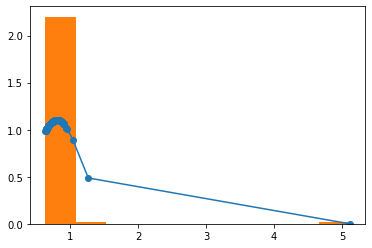

In [45]:
d5 = df4['budget_per_pop']
d5_ = sorted(d5)
fit = stats.norm.pdf(d5_, np.mean(d5_), np.std(d5_))
pl.plot(d5_, fit, '-o')
pl.hist(d5_, density=True, stacked=True)
pl.show

In [46]:
#cleansing outliers
d5_outlier = outliers_iqr(d5)[0]
df4.loc[d5_outlier, 'budget_per_pop']

25     5.115438
105    1.262512
133    1.033663
Name: budget_per_pop, dtype: float64

In [47]:
no_d5_index = []
for i in df.index:
    if i not in d5_outlier:
        no_d5_index.append(i)
print(len(no_d5_index))
df_clean_d5 = df.loc[no_d5_index].reset_index(drop=True)
df_clean_d5
d5_clean = df_clean_d5['budget_per_pop']

149


In [55]:
d5_clean.describe()

count    149.000000
mean       0.766360
std        0.075018
min        0.630726
25%        0.715338
50%        0.767944
75%        0.818535
max        0.954552
Name: budget_per_pop, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

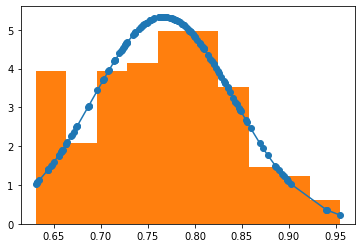

In [49]:
d5_clean_ = sorted(d5_clean)
fit = stats.norm.pdf(d5_clean_, np.mean(d5_clean_), np.std(d5_clean_))
pl.plot(d5_clean_, fit, '-o')
pl.hist(d5_clean_, density=True, stacked=True)
pl.show

**Report Production**

In [57]:
!pip install pandas_profiling
import pandas_profiling

report = df.profile_report()
report.to_file('report.html')

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27086 sha256=d150095335f6e986a6d3dc837938a978984a529e7b9690def9a6082d34d3c3c1
  Stored in directory: c:\users\sangb\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295196 sha256=e5129f5c68a3d811364e9778b1cc8a6502fd89b21eeeb17dccaa50aadb6cbc12
  Stored in directory: c:\users\sangb\appdata\local\pip\cache\wheels\51\f9\a5\740af2fdb0ad1edf79aabdc41531be0b6f0b2e2be684c388cf
Successfully built htmlmin imagehash


**Testing Budget Factors to Growth of X**

In [58]:
# 6 budget factors and cagr
df0 = df[['cagr_rate', 'total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling']]

In [59]:
report0 = df0.profile_report()
report0.to_file('report0.html')

C:\Users\sangb\miniconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [68]:
# terminating outliers from the whole dataframe
def outlier_cleaner(dataset):
    colname = list(dataset.columns.values) # column name extratction
    o_lst = []

    for col in colname:
        outlier = outliers_iqr(df[col])[0] # outlier index for each column
        o_lst.append(list(outlier))

    outlier_list = np.concatenate(o_lst)

    non_o_index = []
    for i in df.index:
        if i not in outlier_list:
            non_o_index.append(i)

    return dataset.loc[non_o_index].reset_index(drop=True)

df0_clean = outlier_cleaner(df0) 
df0_clean.describe()

,cagr_rate,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1.334816,185344.827586,40120.689655,46689.655172,16758.620690,44250.000000,22801.724138,14724.137931
std,0.940114,71444.609551,23228.226896,26284.534647,8019.130051,20568.390692,14194.438487,8485.882093
min,-1.350589,50000.000000,4000.000000,4000.000000,1000.000000,4000.000000,2000.000000,1000.000000
25%,0.676965,137000.000000,24000.000000,29000.000000,10750.000000,30000.000000,13000.000000,8000.000000
50%,1.084930,180000.000000,35500.000000,41000.000000,17000.000000,41500.000000,20000.000000,14000.000000
75%,2.038315,220000.000000,50000.000000,62250.000000,22000.000000,57000.000000,29000.000000,19000.000000
max,3.552601,449000.000000,131000.000000,147000.000000,37000.000000,118000.000000,66000.000000,47000.000000


In [66]:
report0 = df0_clean.profile_report()
report0.to_file('report_clean.html')

In [71]:
# per capita analysis
df0_ = df[['cagr_rate', 'budget_per_pop', 'cleanair_per_pop', 'cleanenv_per_pop', 'health_per_pop', 'school_per_pop', 'media_per_pop', 'counsel_per_pop']]

In [72]:
report0_ = df0_.profile_report()
report0_.to_file('report0_.html')

C:\Users\sangb\miniconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [73]:
df0_clean_0 = outlier_cleaner(df0_)
df0_clean_0.describe()

,cagr_rate,budget_per_pop,cleanair_per_pop,cleanenv_per_pop,health_per_pop,school_per_pop,media_per_pop,counsel_per_pop
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,1.212824,0.762687,0.165869,0.193792,0.071133,0.178962,0.092589,0.060341
std,0.885250,0.073979,0.064392,0.075522,0.030385,0.063110,0.040685,0.024069
min,-0.390980,0.630726,0.021024,0.016075,0.004417,0.004551,0.015531,0.011136
25%,0.575431,0.715007,0.121467,0.139682,0.046537,0.135098,0.058983,0.041208
50%,0.953435,0.763927,0.168558,0.201152,0.072556,0.175798,0.093562,0.059111
75%,1.820819,0.810820,0.207320,0.246194,0.093432,0.221195,0.117352,0.074851
max,3.552601,0.954552,0.326297,0.407520,0.135027,0.343997,0.198439,0.124494


In [74]:
report0_0 = df0_clean_0.profile_report()
report0_0.to_file('report0_0.html')

<AxesSubplot:>

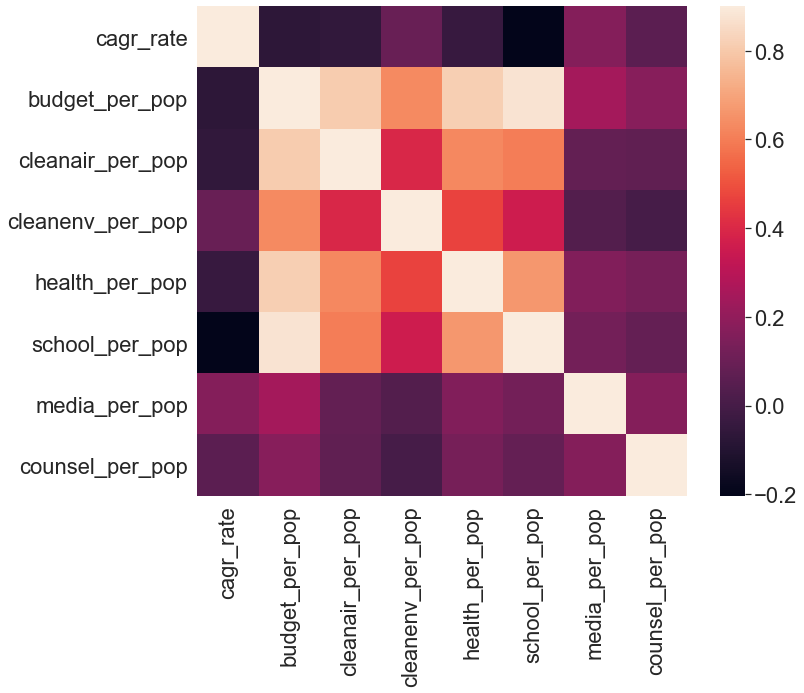

In [76]:
corr2 = df0_.corr()
f2, ax2 = plt.subplots(figsize=(12,9))
sns.heatmap(corr2, vmax=.9, square=True)

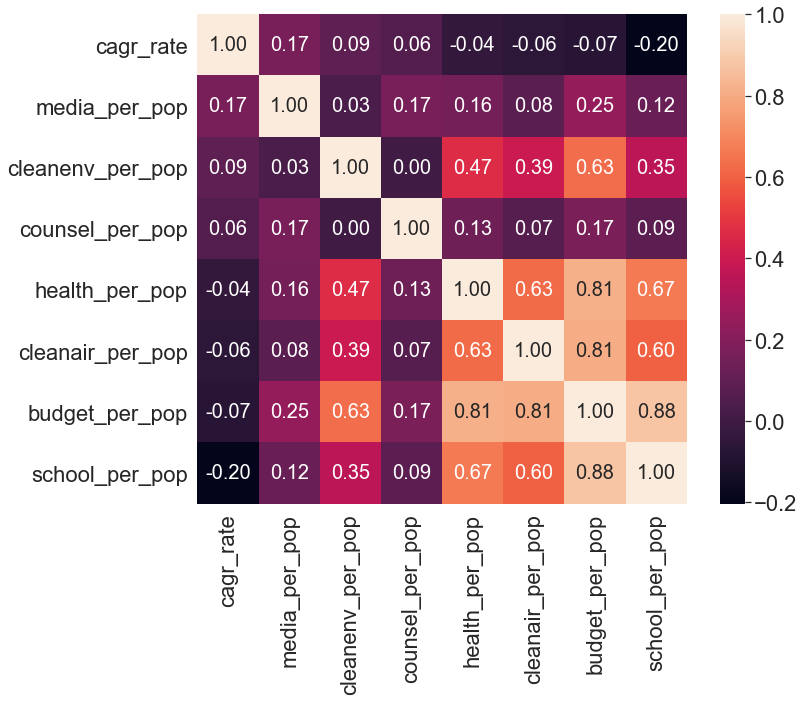

In [81]:
# correlation with outliers
cols2 = corr2.nlargest(10, 'cagr_rate')['cagr_rate'].index
heat2 = np.corrcoef(df0_[cols2].values.T)
sns.set(font_scale=2)
plt.subplots(figsize=(12,9))
hm2 = sns.heatmap(heat2, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols2.values, xticklabels=cols2.values)

<AxesSubplot:>

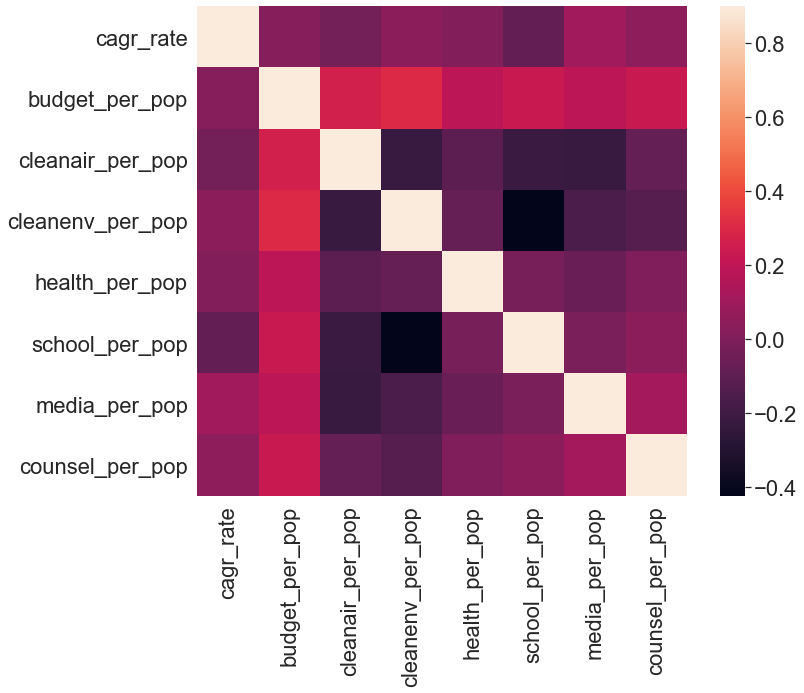

In [77]:

corr3 = df0_clean_0.corr()
f2, ax2 = plt.subplots(figsize=(12,9))
sns.heatmap(corr3, vmax=.9, square=True)

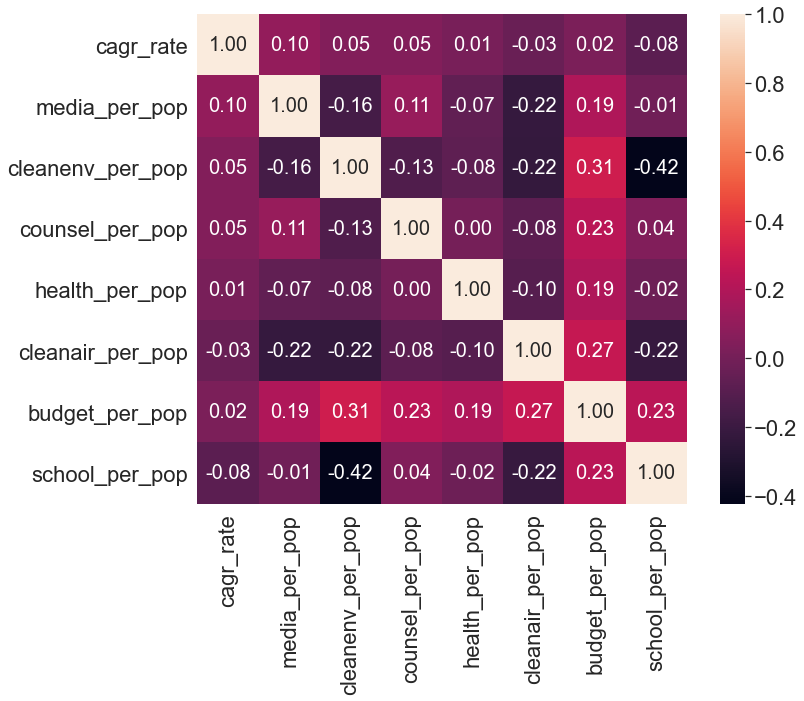

In [90]:
# correlation without outliers

cols3 = corr2.nlargest(10, 'cagr_rate')['cagr_rate'].index # ordered list of cols which show the largest correlation with 'cagr_rate'
heat2 = np.corrcoef(df0_clean_0[cols3].values.T) # Pearson correlation coefficient to each 
sns.set(font_scale=2)
plt.subplots(figsize=(12,9))
hm3 = sns.heatmap(heat2, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols2.values, xticklabels=cols2.values)

**Normality Test**

Text(0, 0.5, 'residual')

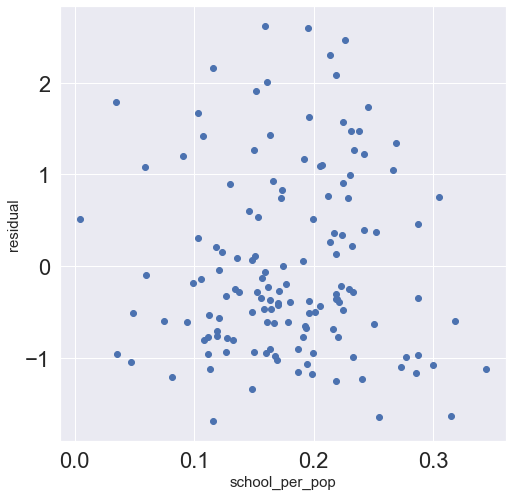

In [94]:
##Normality Test - needed https://blog.naver.com/PostView.naver?blogId=breezehome50&logNo=222339451767&redirect=Dlog&widgetTypeCall=true&directAccess=false

from scipy.stats import norm
from statsmodels.formula.api import ols

fit = ols('cagr_rate ~ school_per_pop', data=df0_clean_0).fit()
sqrt_mse = np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
font_size = 15
plt.scatter(df0_clean_0['school_per_pop'], std_res)
plt.xlabel('school_per_pop', fontsize=font_size)
plt.ylabel('residual', fontsize=font_size)

C:\Users\sangb\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*, block=None)>

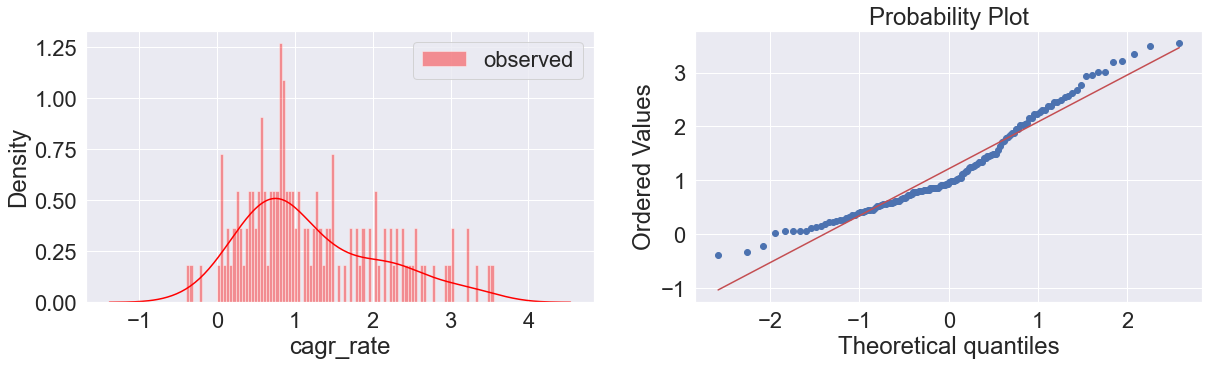

In [105]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
stats.probplot(df0_clean_0['cagr_rate'], plot=plt)

mu = df0_clean_0['cagr_rate'].mean()
variance = df0_clean_0['cagr_rate'].var()
sigma = variance**0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax1.plot

sns.distplot(ax=ax1, a=df0_clean_0['cagr_rate'], bins=100, color='red', label='observed')
ax1.legend()
plt.show